Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [ ]:
                                                                                                                                                    import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Kết nối với google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Di chuyển đến thư mục chứa google colab

In [ ]:
import os
folder = "/content/drive/MyDrive/finalHomework"
os.chdir(folder)

## Upload file

In [ ]:
from requests import post

def upload_file(file_path, upload_url):
    with open(file_path, 'rb') as file:
        files = {'file': (file_path, file)}
        response = post(upload_url, files=files)
        return response

upload_url = 'https://drive.google.com/drive/folders/1KpVsthi1WNdKGW1BVzxvudHGEJ3Fd9UW'
file_path = '/content/drive/MyDrive/finalHomework/WC2022.csv'

uploaded = upload_file(file_path, upload_url)


## List các file trong thư mục

In [ ]:
all_items = os.listdir()
for i in all_items:
  print(all_items)

['WC2022.csv', 'Bản sao của finalHomework.ipynb']
['WC2022.csv', 'Bản sao của finalHomework.ipynb']


# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)


868 ms ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  # start your code here
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]

  res = 0
  for i, buy in enumerate(prices):
      worst_sell = min_right_to_left[i]
      down_fall = (buy - worst_sell) / buy
      res = max(res, down_fall)

  return res
  # end your code

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

887 ms ± 9.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

# Pandas + Matplotlib

## Gọi file csv

In [ ]:
df_matches = pd.read_csv('WC2022.csv' , sep=',', header = 0)
df_events = pd.read_csv('WC2022.csv', index_col= 'events_list', header = 0)

## Hiển thị 5 dòng đầu của dataframe

In [ ]:
first_five_lines_matches = df_matches.head()
print(first_five_lines_matches)

total_cols = len(df_events)
first_five_lines_events = df_events.head().iloc[:, total_cols - 7:]
print(first_five_lines_events)







   match_id                  stage        date   pens pens_home_score  \
0         1                  Final  18/12/2022   True               4   
1         2  Match for third place  17/12/2022  False           False   
2         3            Semi-finals  14/12/2022  False           False   
3         4            Semi-finals  13/12/2022  False           False   
4         5         Quarter-finals  10/12/2022  False           False   

  pens_away_score team_name_home team_name_away  team_home_score  \
0               2      Argentina         France                3   
1           False        Croatia        Morocco                2   
2           False         France        Morocco                2   
3           False      Argentina        Croatia                3   
4           False        England         France                1   

   team_away_score  ...  prediction_team_away_win  prediction_quantity  \
0                3  ...                      0.33              1002364   
1   

## Hiển thị 5 dòng cuối của các dataframe

In [ ]:
tail_five_lines_matches = df_matches.tail()
print(tail_five_lines_matches)

total_cols = len(df_events)
first_five_lines_events = df_events.head().iloc[:, total_cols - 7:]
print(first_five_lines_events)


    match_id                    stage        date   pens pens_home_score  \
59        60  Group stage: Matchday 1  22/11/2022  False           False   
60        61  Group stage: Matchday 1  21/11/2022  False           False   
61        62  Group stage: Matchday 1  21/11/2022  False           False   
62        63  Group stage: Matchday 1  21/11/2022  False           False   
63        64  Group stage: Matchday 1  20/11/2022  False           False   

   pens_away_score team_name_home team_name_away  team_home_score  \
59           False      Argentina   Saudi Arabia                1   
60           False            USA          Wales                1   
61           False        Senegal    Netherlands                0   
62           False        England           Iran                6   
63           False          Qatar        Ecuador                0   

    team_away_score  ...  prediction_team_away_win  prediction_quantity  \
59                2  ...                      0.04   

## In ra thông tin của từng dataframe

In [ ]:
print(df_matches)

    match_id                    stage        date   pens pens_home_score  \
0          1                    Final  18/12/2022   True               4   
1          2    Match for third place  17/12/2022  False           False   
2          3              Semi-finals  14/12/2022  False           False   
3          4              Semi-finals  13/12/2022  False           False   
4          5           Quarter-finals  10/12/2022  False           False   
..       ...                      ...         ...    ...             ...   
59        60  Group stage: Matchday 1  22/11/2022  False           False   
60        61  Group stage: Matchday 1  21/11/2022  False           False   
61        62  Group stage: Matchday 1  21/11/2022  False           False   
62        63  Group stage: Matchday 1  21/11/2022  False           False   
63        64  Group stage: Matchday 1  20/11/2022  False           False   

   pens_away_score team_name_home team_name_away  team_home_score  \
0                2

In [ ]:
print(df_events)

                                                    match_id  \
events_list                                                    
[{'event_team': 'home', 'event_time': " 23' ", ...         1   
[{'event_team': 'home', 'event_time': " 7' ", '...         2   
[{'event_team': 'home', 'event_time': " 5' ", '...         3   
[{'event_team': 'away', 'event_time': " 32' ", ...         4   
[{'event_team': 'away', 'event_time': " 17' ", ...         5   
...                                                      ...   
[{'event_team': 'home', 'event_time': " 10' ", ...        60   
[{'event_team': 'home', 'event_time': " 11' ", ...        61   
[{'event_team': 'away', 'event_time': " 56' ", ...        62   
[{'event_team': 'away', 'event_time': " 20' ", ...        63   
[{'event_team': 'away', 'event_time': " 4' ", '...        64   

                                                                      stage  \
events_list                                                                   
[{'event_

- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

In [ ]:
# Kiểm tra giá trị null
null_values = df_matches.isnull().sum()  # Số lượng giá trị null trong mỗi cột

# Kiểm tra xem có giá trị null nào hay không
if null_values.sum() > 0:
    print("DataFrame chứa giá trị null.")
    print("Số lượng giá trị null trong mỗi cột:")
    print(null_values)

    numeric_cols = df_matches.select_dtypes(include=np.number).columns.tolist()
    for col in numeric_cols:
        col_mean = df_matches[col].mean()
        df_matches[col].fillna(col_mean, inplace=True)

    # Hoặc xóa các hàng chứa giá trị null
    # df.dropna(inplace=True)

    print("\nDữ liệu sau khi xử lý giá trị null:")
    print(df_matches)
else:
    print("DataFrame không chứa giá trị null.")


DataFrame không chứa giá trị null.


## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [ ]:
filtered_df = df_matches[['team_name_home', 'team_name_away']][df_matches['team_home_score'] + df_matches['team_away_score'] > 3]
print(filtered_df)

   team_name_home team_name_away
0       Argentina         France
6     Netherlands      Argentina
8        Portugal    Switzerland
10         Brazil    South Korea
13         France         Poland
15    Netherlands            USA
17         Serbia    Switzerland
21     Costa Rica        Germany
34    South Korea          Ghana
35       Cameroon         Serbia
37        Croatia         Canada
46          Qatar        Senegal
49       Portugal          Ghana
53          Spain     Costa Rica
56         France      Australia
62        England           Iran


## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

In [ ]:
...

## Lấy ra tên của các đội tham dự giải đấu

In [ ]:
unique_names = df_matches['team_name_home'].drop_duplicates()

print("\nTên của các đội tham dự giải đấu:")
print(unique_names)


Tên của các đội tham dự giải đấu:
0        Argentina
1          Croatia
2           France
4          England
5          Morocco
6      Netherlands
8         Portugal
10          Brazil
11           Japan
16        Cameroon
17          Serbia
18     South Korea
19           Ghana
21      Costa Rica
23          Canada
24          Poland
25    Saudi Arabia
26         Tunisia
27       Australia
28           Wales
29            Iran
31         Ecuador
36           Spain
38         Belgium
46           Qatar
50         Uruguay
51     Switzerland
54         Germany
57          Mexico
58         Denmark
60             USA
61         Senegal
Name: team_name_home, dtype: object


## Lấy ra số bàn thắng được ghi bởi các đội

In [ ]:
total_scores_home = df_matches.groupby('team_name_home')['team_home_score'].sum()
total_scores_away = df_matches.groupby('team_name_away')['team_away_score'].sum()

sum_all_scores = total_scores_home + total_scores_away
print("\nsố bàn thắng được ghi bởi các đội:")

print(sum_all_scores)


số bàn thắng được ghi bởi các đội:
team_name_home
Argentina       15
Australia        4
Belgium          1
Brazil           8
Cameroon         4
Canada           2
Costa Rica       3
Croatia          8
Denmark          1
Ecuador          4
England         13
France          16
Germany          6
Ghana            5
Iran             4
Japan            5
Mexico           2
Morocco          6
Netherlands     10
Poland           3
Portugal        12
Qatar            1
Saudi Arabia     3
Senegal          5
Serbia           5
South Korea      5
Spain            9
Switzerland      5
Tunisia          1
USA              3
Uruguay          2
Wales            1
dtype: int64


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

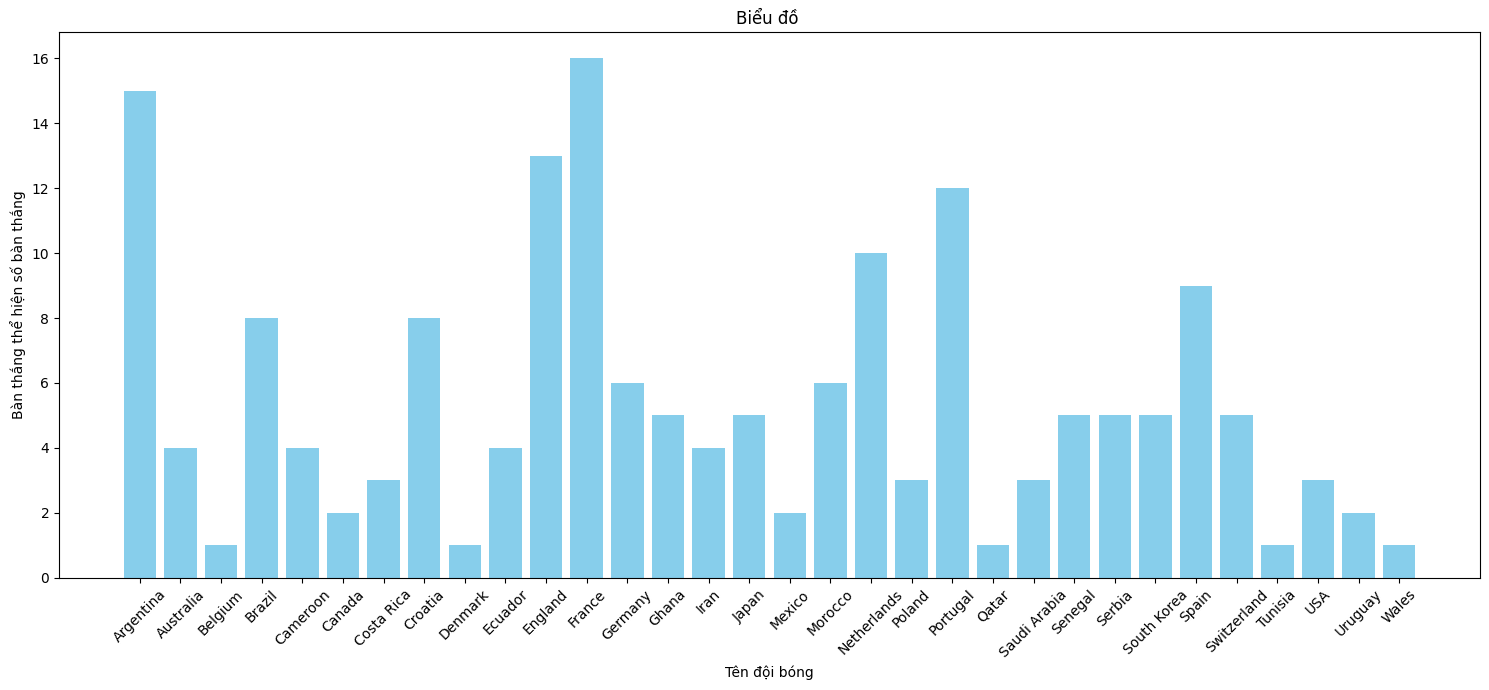

In [ ]:
# Tạo biểu đồ cột thể hiện điểm của các học sinh
plt.figure(figsize=(15, 7))

plt.bar( sum_all_scores.index, sum_all_scores.values, color='skyblue')

plt.xlabel('Tên đội bóng')
plt.ylabel('Bàn thắng thể hiện số bàn thắng')
plt.title('Biểu đồ ')
plt.xticks(rotation=45)  # Xoay tên
plt.tight_layout()

plt.show()


##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [ ]:
...

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

In [ ]:
...

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
...

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

In [ ]:
import cv2
image = cv2.imread('freeDrawExport_012314055352.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng phương pháp threshold để tạo ảnh nhị phân
_, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Tìm contours trong ảnh
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Duyệt qua các contours và tìm bounding box
for contour in contours:
    # Bỏ qua các contour có diện tích nhỏ
    if cv2.contourArea(contour) > 100:  # Có thể thay đổi giá trị ngưỡng diện tích tùy thuộc vào ảnh của bạn
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Hiển thị hình ảnh với bounding box
cv2.imshow('Image with bounding box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

In [ ]:
import numpy as np
import cv2

# Tạo hình ảnh với nền màu đen (kích thước 500x800)
height, width = 430, 350
img = np.zeros((height, width, 3), dtype=np.uint8)  # Tạo ma trận các giá trị 0

# Màu cam (BGR: (0, 140, 255))
orange_color = (0, 140, 255)

# Tọa độ trung tâm và bán kính của hình tròn
center_coordinates = (width // 2, height // 2)
radius = 165

# Văn bản cần chèn
text_HIT = "HIT"
text_CLUB = "CLUB"
text_CLB = "CLB Tin Hoc DH CNHN"

# Tọa độ và font
center_text_HIT = (65, 270)
center_text_CLUB = (115, 315)
center_text_CLB = (66, 310)
font_face = cv2.FONT_HERSHEY_SIMPLEX

text_size = cv2.getTextSize(text_CLUB, font_face, 7, 5)[0]
text_x = int((width - text_size[0]) / 2)
text_y = int((height + text_size[1]) / 2)

cv2.putText(img, text_CLUB, center_text_CLUB, font_face, 1, orange_color, 2, cv2.LINE_AA)

# Vẽ 3 đường thẳng
cv2.line(img, (236, 220),  (264, 220), orange_color,2 , cv2.LINE_AA)
cv2.line(img, (250, 220),  (250, 250), orange_color,2 , cv2.LINE_AA)
cv2.line(img, (250, 250),  (270, 250), orange_color,2 , cv2.LINE_AA)

rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 1)
rotation_out = cv2.warpAffine(img, rotation_matrix, (width, height))

cv2.putText(rotation_out, text_HIT, center_text_HIT, font_face, 4.5, orange_color, 19 ,cv2.LINE_AA)
cv2.putText(rotation_out, text_CLB, center_text_CLB, font_face, 0.6, orange_color, 2 ,cv2.LINE_AA)

# Vẽ hình tròn
cv2.circle(rotation_out, center_coordinates, radius, orange_color, 4,cv2.LINE_AA)

# Vẽ hình elip
cv2.ellipse(rotation_out, (175, 140), (25, 15), 0, 0, 360, orange_color, 2, cv2.LINE_AA)

# Hiển thị hình ảnh với nền đen
cv2.imshow('HIT', rotation_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lưu hình ảnh
cv2.imwrite('HIT.png', rotation_out)


Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [ ]:
import numpy as np
import cv2

# Tạo hình ảnh với nền màu đen (kích thước 500x800)
height, width = 430, 350
img = np.zeros((height, width, 3), dtype=np.uint8)  # Tạo ma trận các giá trị 0

# Màu cam (BGR: (0, 140, 255))
orange_color = (0, 140, 255)

# Tọa độ trung tâm và bán kính của hình tròn
center_coordinates = (width // 2, height // 2)
radius = 165

# Văn bản cần chèn
text_HIT = "HIT"
text_CLUB = "CLUB"
text_CLB = "CLB Tin Hoc DH CNHN"

# Tọa độ và font
center_text_HIT = (65, 270)
center_text_CLUB = (115, 315)
center_text_CLB = (66, 310)
font_face = cv2.FONT_HERSHEY_SIMPLEX

text_size = cv2.getTextSize(text_CLUB, font_face, 7, 5)[0]
text_x = int((width - text_size[0]) / 2)
text_y = int((height + text_size[1]) / 2)

cv2.putText(img, text_CLUB, center_text_CLUB, font_face, 1, orange_color, 2, cv2.LINE_AA)

# Vẽ 3 đường thẳng
cv2.line(img, (236, 220),  (264, 220), orange_color,2 , cv2.LINE_AA)
cv2.line(img, (250, 220),  (250, 250), orange_color,2 , cv2.LINE_AA)
cv2.line(img, (250, 250),  (270, 250), orange_color,2 , cv2.LINE_AA)

rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 1)
rotation_out = cv2.warpAffine(img, rotation_matrix, (width, height))

cv2.putText(rotation_out, text_HIT, center_text_HIT, font_face, 4.5, orange_color, 19 ,cv2.LINE_AA)
cv2.putText(rotation_out, text_CLB, center_text_CLB, font_face, 0.6, orange_color, 2 ,cv2.LINE_AA)

# Vẽ hình tròn
cv2.circle(rotation_out, center_coordinates, radius, orange_color, 4,cv2.LINE_AA)

# Vẽ hình elip
cv2.ellipse(rotation_out, (175, 140), (25, 15), 0, 0, 360, orange_color, 2, cv2.LINE_AA)

# Mịn hoặc làm mờ ảnh rotation_out
# Điều chỉnh kích thước kernel và các tham số tùy thuộc vào từng hàm để có kết quả phù hợp với mong muốn của bạn

# Làm mịn ảnh bằng GaussianBlur
gaussian_blur = cv2.GaussianBlur(rotation_out, (5, 5), 0.6)  # Kích thước kernel: (5, 5), độ lệch chuẩn = 0

# Làm mịn ảnh bằng bilateralFilter
bilateral_filtered = cv2.bilateralFilter(gaussian_blur, 9, 75, 60)  # Các tham số: (ảnh, đường kính không gian, độ mịn màu sắc, độ mịn không gian)

# Hiển thị các ảnh đã làm mịn hoặc làm mờ
cv2.imshow('Filtered - bilateralFilter', bilateral_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lưu các ảnh đã làm mịn hoặc làm mờ
cv2.imwrite('HIT_bilateral_filtered.png', bilateral_filtered)
